<h1> Problem set 3 </h1> 
Akshita Gundavarapu 
<h2> 1 Explore Distributions </h2> 
<h3> 1.1 

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

In [37]:
S = 10000

<h3> 1.2 

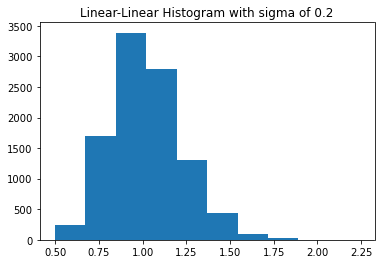

In [38]:
x = np.random.lognormal(0, 0.2, size=S)
_ = plt.hist(x)
_ = plt.title("Linear-Linear Histogram with sigma of 0.2")


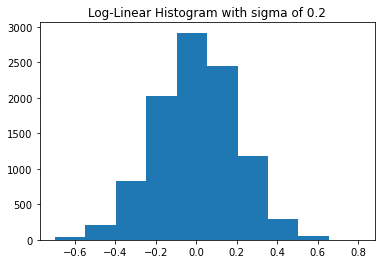

In [39]:
_ = plt.hist(np.log(x))
_ = plt.title("Log-Linear Histogram with sigma of 0.2")


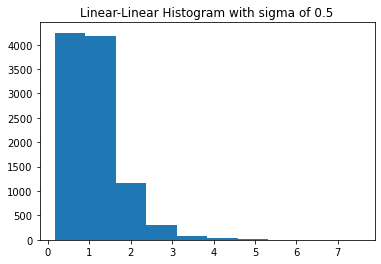

In [40]:
y = np.random.lognormal(0, 0.5, size=S)
_ = plt.hist(y)
_ = plt.title("Linear-Linear Histogram with sigma of 0.5")


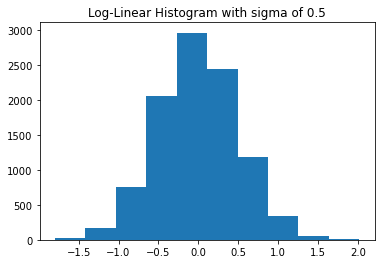

In [41]:
_ = plt.hist(np.log(y))
_ = plt.title("Log-Linear Histogram with sigma of 0.5")


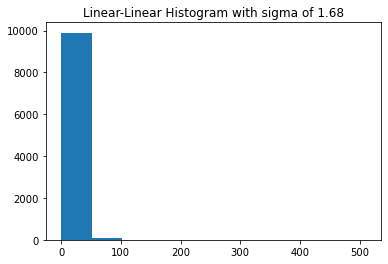

In [42]:
z = np.random.lognormal(0, 1.68, size=S)
_ = plt.hist(z)
_ = plt.title("Linear-Linear Histogram with sigma of 1.68")


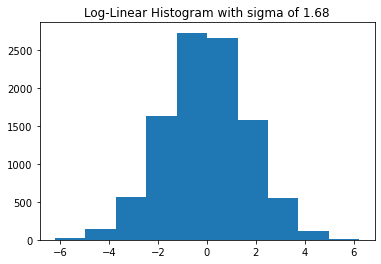

In [43]:
_ = plt.hist(np.log(z))
_ = plt.title("Log-Linear Histogram with sigma of 1.68")


Comment the shape of histograms: do they look skewed? Do they look normal?

The linear-linear distributions of all three sigmas look right skewed while the histograms on the log kinear scale look more normal.

<h3> 1.3 </h3> 

Look at the histograms and tell-what do you think, which one describes the least unequal distribution, and which one the most unequal distribution?

The distribution with sigma 0.2 seems to be the most unequal distribution. This is because on the log-linear scale its histogram is looks normal and the distribution seems to be spreadf from -0.6 to 0.6. The other two distributions though they may look normal on the log-linear scale have a far wider spread. 

<h3> 1.4 </h3> 

Comparing means: 

In [44]:
print(np.mean(x))
mu = 0
sigma_x = 0.2
mean_x = (math.e**(mu + ((1/2)*(sigma_x**2))))
print(mean_x)


1.0219556437622914
1.0202013400267558


In [45]:
print(np.mean(y))
mu = 0
sigma_y = 0.5
mean_y = (math.e**(mu + ((1/2)*(sigma_y**2))))
print(mean_y)

1.1262618745386226
1.1331484530668263


In [46]:
print(np.mean(z))
mu = 0
sigma_z = 1.68
mean_z = (math.e**(mu + ((1/2)*(sigma_z**2))))
print(mean_z)

4.055560580015648
4.1008735008239405


Comparing variance: 

In [47]:
print(np.var(x))
mu = 0
sigma_x = 0.2
part_1 = math.e**((2*mu)+(sigma_x**2))
part_2 = (math.e**(sigma_x**2)) - 1
var_x = part_1 * part_2
print(var_x)

0.04171342269757939
0.04247629348257031


In [48]:
print(np.var(y))
mu = 0
sigma_y = 0.5
part_1 = math.e**((2*mu)+(sigma_y**2))
part_2 = (math.e**(sigma_y**2)) - 1
var_y = part_1 * part_2
print(var_y)

0.3682608144123113
0.3646958540123865


In [49]:
print(np.var(z))
mu = 0
sigma_z = 1.68
part_1 = math.e**((2*mu)+(sigma_z**2))
part_2 = (math.e**(sigma_z**2)) - 1
var_z = part_1 * part_2
print(var_z)

185.63793372406863
265.99982369887033


Are these similar?

The theoretical means and theoretical variances are similar to the sample means and sample variances more when sigma is 0.2. The theoretical and sample means and variances seem to have more of a difference when sigma is 0.5 and 1.68. 

<h3> 1.5

In [50]:
def equality(value, total_value):
    for i in range(1, 51):
        top = np.percentile(value, 100-i)
        total = value[value > top].sum()
        if ((total/total_value) > (100-i)/100): 
            i = i - 1
        if ((total/total_value) < (100-i)/100): 
            i = i + 1
        else:
            value = i
            break
    return(value)

print(equality(x, np.sum(x)))
print(equality(y, np.sum(y)))
print(equality(z, np.sum(z)))

46
40
20


Compute the 20/80 ratio for all the three distributions. You can re-use your code from PS2.
Hint: the answers should be similar to what is in Table 1.7 in lecture notes (page 46 for now)

| Sigma    |ratio|
| ----------- | ----------- |
| 0.2      | 46 : 54 |
| 0.5  | 40 : 60 |
| 1.68  | 20 : 80 |


<h3> 1.6 

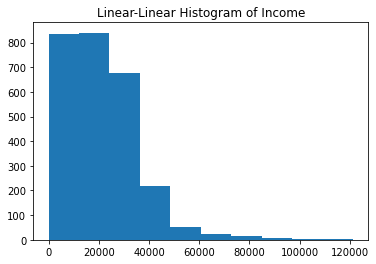

In [15]:
treatment =  pd.read_csv("data /treatment.csv", sep ="\t")
tr = plt.hist(treatment.re78) 
tr = plt.title("Linear-Linear Histogram of Income")

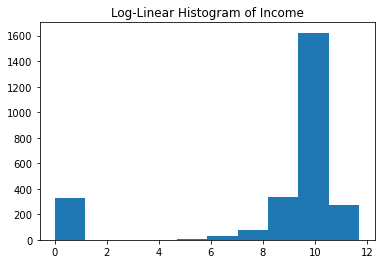

In [16]:
tr = plt.hist(np.log(treatment.re78+1)) 
tr = plt.title("Log-Linear Histogram of Income")

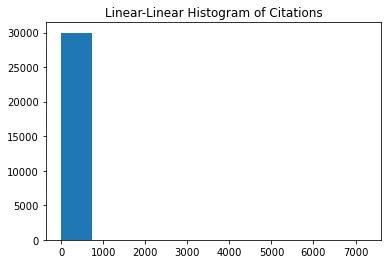

In [17]:
mag =  pd.read_csv("data /mag-30k-citations.csv", sep ="\t")
mg = plt.hist(mag.citations) 
mg = plt.title("Linear-Linear Histogram of Citations")

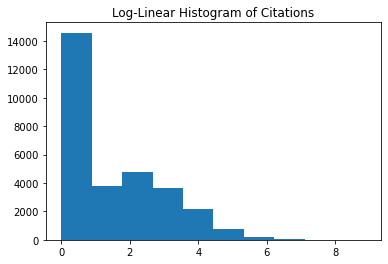

In [18]:
mg = plt.hist(np.log(1 + mag['citations'])) 
mg = plt.title("Log-Linear Histogram of Citations")

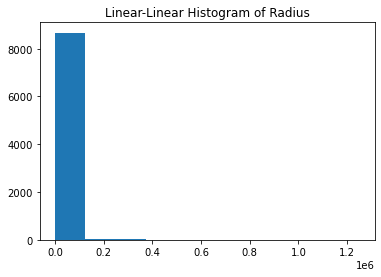

In [19]:
lunar = pd.read_csv("data /lunar-impact-craters_v08-2015-09.csv", sep ="\t")
lu = plt.hist(lunar['7. Radius [m]']) 
lu = plt.title("Linear-Linear Histogram of Radius")

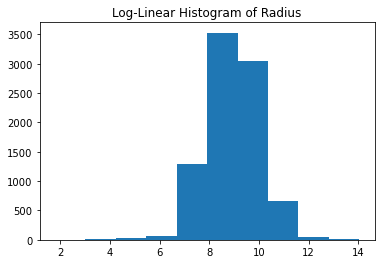

In [20]:
lu = plt.hist(np.log(1 + lunar['7. Radius [m]'])) 
lu = plt.title("Log-Linear Histogram of Radius")

Do these histograms look like log-normal, or like something else?

The histograms for the Income and Citations data may not be log normal as they appear to be skewed even on the log normal scale.

The histogram for the Radius data may be log-normal because the it appears to have a somewhat normal distribution on the log-normal scale.

<h2> 2 Explore Central Limit Theorem </h2> 
<h3> 2.1 

In [9]:
rv = np.random.randint(0,2, size=10)*2 - 1
rv

array([-1, -1, -1, -1,  1, -1, -1, -1,  1,  1])

In [21]:
expected_value = ((-1)*0.5) + (1*0.5)
expected_value 

0.0

In [23]:
var = ((((-1)**2)*0.5) + ((1**2)*0.5))-((expected_value)**2)
var

1.0

<h3> 2.2

In [8]:
R = 1_000
S = 1

<h3> 2.3

In [9]:
np.random.seed(1)
rvs = []

for i in range(1, R):
    x = np.random.randint(0,2, size = S)*2 - 1
    rvs.append(x)


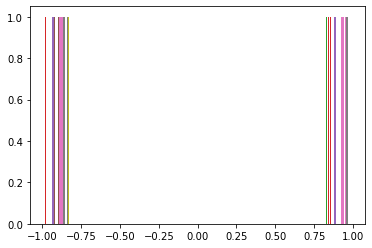

In [10]:
_ = plt.hist(rvs)

***This histogram was taking forever to run for some reason. It was only r
<h3> 2.4

Comment the shape of the histogram.

This histogram has two distinct peaks. One at around -1 and the other at 1. 


In [29]:
np.mean(rvs)

-0.043043043043043044

In [30]:
np.var(rvs)

0.9981472964455949

Compare these numbers with the theoretical values computed at question 1 above.

The sample means are relatively close to the theoretical means calculated in question 1. They are only off by a few decimal places
<h3> 2.5

In [31]:
rvs_1 = []

for i in range(1, R):
    x = np.random.randint(0,2, size = 2)*2 - 1
    rvs_1.append(x)
    
rvmeans = []
for i in range(1,R-1):
    mean = np.mean(rvs_1[i])
    rvmeans.append(mean)


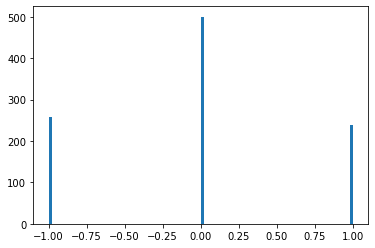

In [32]:
_ = plt.hist(rvmeans, bins= 100)

How does this look like? 

This histogram shows a somewhat equal distribution. There are three peaks now instead of 2.
<h3> 2.6

In [40]:
np.mean(rvmeans)

-0.004008016032064128

In [41]:
np.var(rvmeans)

0.509001971879631

In [23]:
#Theoretical mean and variance
expected_value = 0
print(expected_value)
var = 1 / 2
print(var)

0
0.5


<h3> 2.7 </h3> 
Compare the theoretical values with the sample values above. Are those fairly similar?

The theoretical values and the sample values are fairly similar.

<h3> 2.8

In [43]:
rvs_2 = []

for i in range(1, R):
    x = np.random.randint(0,2, size = 5)*2 - 1
    rvs_2.append(x)
    
rvmeans_1 = []
for i in range(1,R-1):
    mean = np.mean(rvs_2[i])
    rvmeans_1.append(mean)


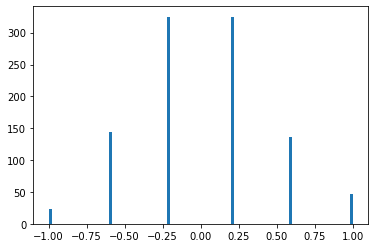

In [46]:
_ = plt.hist(rvmeans_1, bins = 100)

In [47]:
np.mean(rvmeans_1), np.var(rvmeans_1)

(0.018036072144288578, 0.19582700471082445)

In [24]:
#Theoretical mean and variance
expected_value =  0
print(expected_value)
var = 1/5
print(var)

0
0.2


Compare the theoretical and sample version of mean and variance of 5-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?

Yes, the theoretical values and the sample values are fairly similar. The histogram has more peaks than the previous histograms. This histogram also appears to be somewhat normally distributed.

<h3> 2.9

In [27]:
rvs_3 = []

for i in range(1, R):
    x = np.random.randint(0,2, size = 25)*2 - 1
    rvs_3.append(x)
    
rvmeans_2 = []
for i in range(1,R-1):
    mean = np.mean(rvs_3[i])
    rvmeans_2.append(mean)


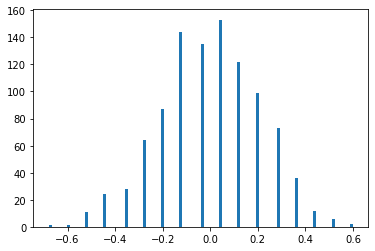

In [28]:
_ = plt.hist(rvmeans_2, bins = 100)

In [29]:
np.mean(rvmeans_2), np.var(rvmeans_2)

(-0.0020841683366733467, 0.04395878249484942)

In [25]:
#Theoretical mean and variance
expected_value = 0
var = 1/25
print(var)

0.04


Compare the theoretical and sample version of mean and variance of 25-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?

Yes, the theoretical values and the sample values are fairly similar. The histogram has more peaks than the previous histograms. This histogram also appears to be more normally distributed than the previous histogram.

<h3> 2.10

In [30]:
rvs_4 = []

for i in range(1, R):
    x = np.random.randint(0,2, size = 100)*2 - 1
    rvs_4.append(x)
    
rvmeans_3 = []
for i in range(1,R-1):
    mean = np.mean(rvs_4[i])
    rvmeans_3.append(mean)


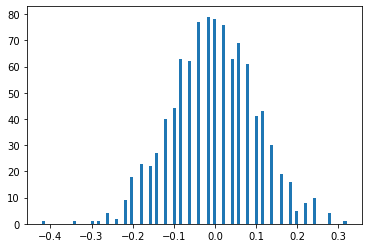

In [31]:
_ = plt.hist(rvmeans_3, bins = 100)

In [32]:
np.mean(rvmeans_3), np.var(rvmeans_3)

(-0.003466933867735471, 0.01061683808498761)

In [33]:
#Theoretical mean and variance
expected_value = 0
print(expected_value)
var = 1/100
print(var)

0
0.01


Compare the theoretical and sample version of mean and variance of 100-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?

Yes, the theoretical values and the sample values are fairly similar. The histogram has more peaks than the previous histograms. This histogram also appears to be more normally distributed than the previous histogram.


<h3> 2.11 </h3> 

As the tuple size increases the shape of the histogram appears to become more and more normal. 
<h3> 2.12 </h3> 

Explain why do the histograms resemble normal distribution as S grows.
In particular, explain what happens when we move from single values S = 1 to pairs
S = 2. Why did two equal peaks turn into a “山”-shaped histogram?

As the number of tuples increases the histograms start to resemble a normal distribution. When S=1, the distribution only has two distinct peaks. This is because the only values in the distribution are -1 or 1. When we take S=2 The values in the distribution is the mean values of the pairs. So the distribution can have values of 0, -1 or 1. This leads to having 3 peaks in the histogram with 2 tuples. 

<h3> Finally... </h3> 

I spent about 5 hrs on this assignmnent. 
